# Part -1 EDA

## Importing Neccessary libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [68]:
train_data = pd.read_csv("/kaggle/input/energy-predictor/new_train.csv")
building_data = pd.read_csv("/kaggle/input/energy-predictor/building_metadata.csv")
weather_data = pd.read_csv("/kaggle/input/energy-predictor/new_weather.csv")

## Viewing a preview of the dataset


In [69]:
train_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [70]:
train_data.describe()

,building_id,meter,meter_reading
count,6.530428e+06,6.530428e+06,6.530428e+06
mean,2.604831e+02,4.278568e-01,2.202368e+02
std,1.491621e+02,8.856750e-01,5.979971e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,0.000000e+00,1.663000e+01
50%,2.390000e+02,0.000000e+00,6.270000e+01
75%,3.750000e+02,0.000000e+00,1.825800e+02
max,5.640000e+02,3.000000e+00,1.726110e+05


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530428 entries, 0 to 6530427
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 199.3+ MB


In [72]:
building_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [73]:
weather_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [74]:
print("Shape of train data:",train_data.shape)
print("Shape of bulding data:",building_data.shape)
print("Shape of weather data",weather_data.shape)

Shape of train data: (6530428, 4)
Shape of bulding data: (565, 6)
Shape of weather data (35110, 9)


In [75]:
train_data

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.00
1,1,0,2016-01-01 00:00:00,0.00
2,2,0,2016-01-01 00:00:00,0.00
3,3,0,2016-01-01 00:00:00,0.00
4,4,0,2016-01-01 00:00:00,0.00
...,...,...,...,...
6530423,560,0,2016-12-31 23:00:00,339.29
6530424,561,0,2016-12-31 23:00:00,610.67
6530425,562,0,2016-12-31 23:00:00,298.33
6530426,563,0,2016-12-31 23:00:00,45.81


## Merging the data

In [76]:
train = train_data.merge(building_data, on="building_id", how='left')
train=train.merge(weather_data, on=['site_id','timestamp'], how='left')

In [77]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [78]:
print("Shape of combined data:",train.shape)

Shape of combined data: (6530428, 16)


## Breaking Timestamp into Hour, Day, Month, Year

In [79]:
def breakdown_timestamp(dataframe):
    dataframe['timestamp']=pd.to_datetime(dataframe['timestamp'])
    dataframe['hour']=np.uint8(dataframe['timestamp'].dt.hour)
    dataframe['day']=np.uint16(dataframe['timestamp'].dt.day)
    dataframe['dayofweek']=np.uint(dataframe['timestamp'].dt.dayofweek)
    dataframe['dayofyear']=np.uint16(dataframe['timestamp'].dt.dayofyear)
    dataframe['month']=np.uint8(dataframe['timestamp'].dt.month)
    dataframe['year']=np.uint16(dataframe['timestamp'].dt.year)
    
    return dataframe
        

In [80]:
train=breakdown_timestamp(train)

In [81]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,dayofweek,dayofyear,month,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,1,4,1,1,2016
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,1,4,1,1,2016
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,1,4,1,1,2016
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,1,4,1,1,2016
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,1019.7,0.0,0.0,0,1,4,1,1,2016


In [82]:
print("New Shape of train data is:",train.shape)

New Shape of train data is: (6530428, 22)


## Exploring the Target Value 'Meter Reading'

In [83]:
sns.set_theme()

def draw_distribution_graph(dataframe, column_name):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.distplot(dataframe[column_name], color='purple', ax = ax).set_title("Distribution Graph for{}".format(column_name), fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

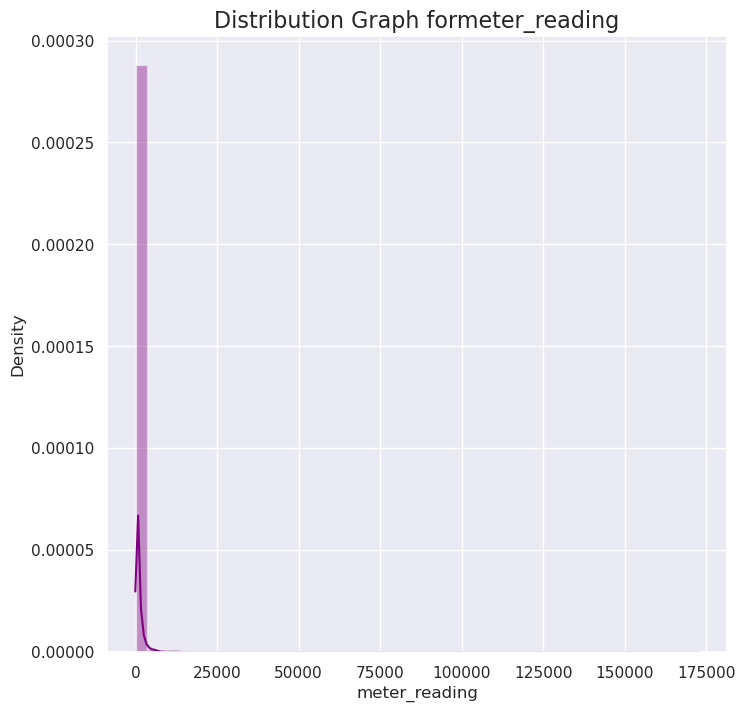

In [84]:
draw_distribution_graph(train, 'meter_reading')

In [85]:
print('Meter Reading has a skewness of', train['meter_reading'].skew())

Meter Reading has a skewness of 12.3384584004144


In [86]:
train['meter_reading']=np.log1p(train['meter_reading'])

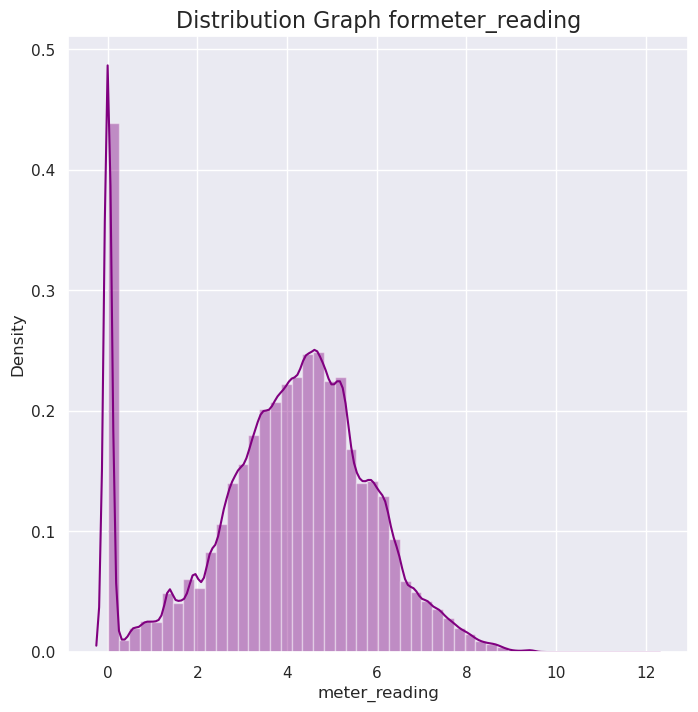

In [87]:
draw_distribution_graph(train, 'meter_reading')

In [88]:
print('Meter Reading has a new skewness of', train['meter_reading'].skew())

Meter Reading has a new skewness of -0.43008588121795605


## Exploring Different Meter Types

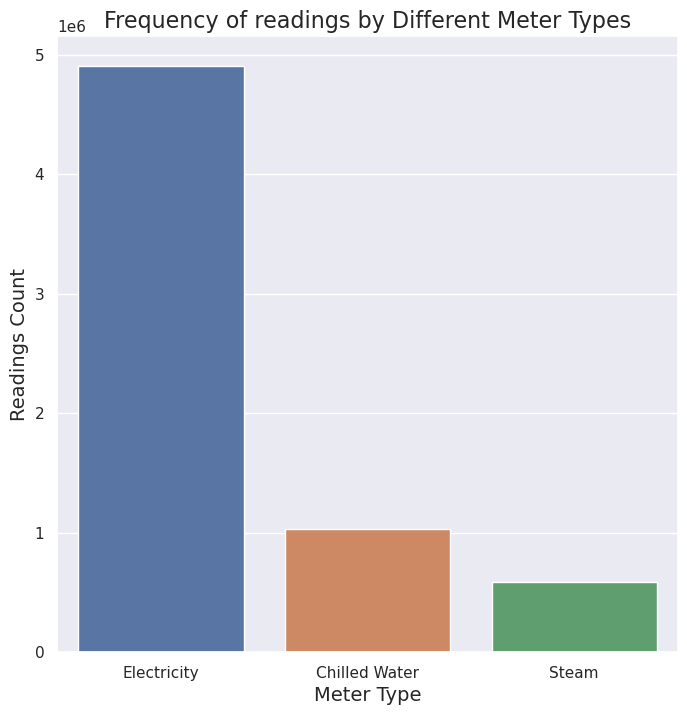

In [89]:
fig, ax = plt.subplots(figsize=(8,8))
meter_types_labels = ['Electricity','Chilled Water','Steam',]
sns.countplot(x='meter',data=train).set_title("Frequency of readings by Different Meter Types", fontsize=16)
ax.set_xticklabels(meter_types_labels)
plt.xlabel('Meter Type', fontsize=14)
plt.ylabel('Readings Count', fontsize=14)
plt.show()

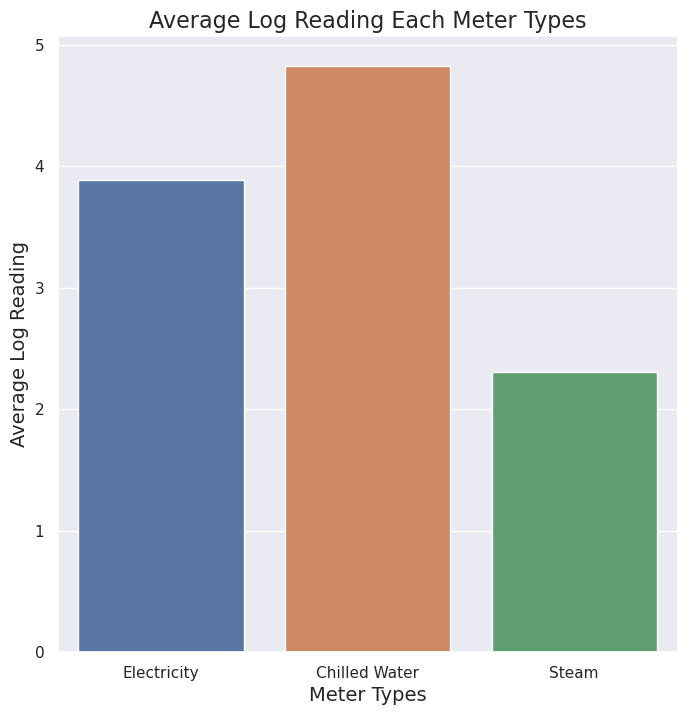

In [90]:
# Making a copy of the dataset to group by meter type

fig,ax=plt.subplots(figsize=(8,8))
meter_types = train.groupby('meter').meter_reading.mean().reset_index()
sns.barplot(x='meter',y='meter_reading',data=meter_types).set_title('Average Log Reading Each Meter Types', fontsize=16)
ax.set_xticklabels(meter_types_labels)
plt.xlabel('Meter Types', fontsize=14)
plt.ylabel('Average Log Reading',fontsize=14)
plt.show()

## Exploring Frequency of the Different Primary Use Categories

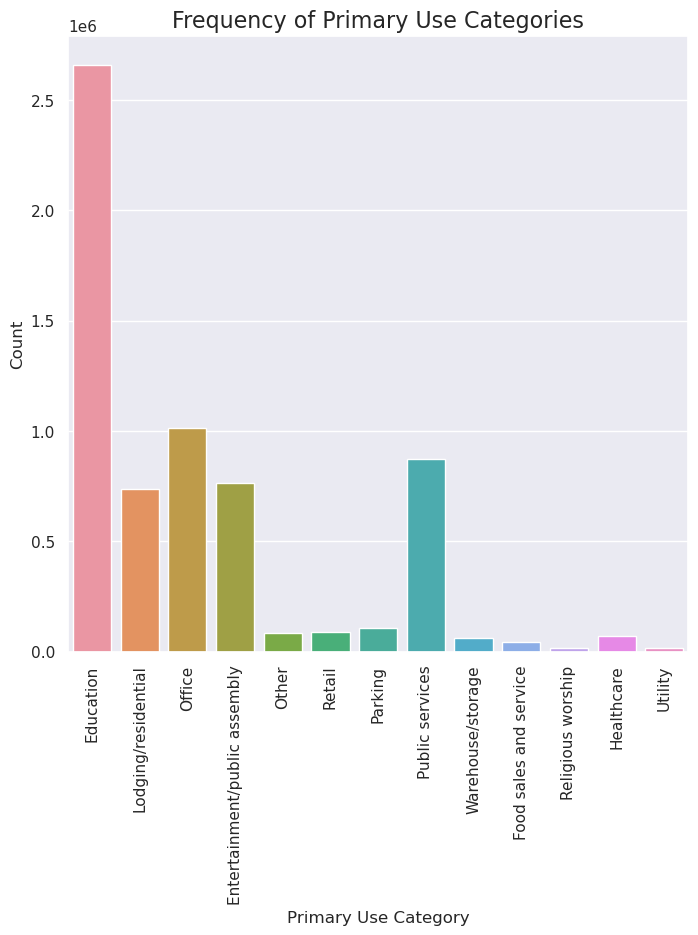

In [91]:
plt.figure(figsize=(8,8))
sns.countplot(x='primary_use', data=train).set_title("Frequency of Primary Use Categories", fontsize = 16)
plt.xticks(rotation=90)
plt.xlabel('Primary Use Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Exploring Average Meter Reading Per Site and Use Category

<function matplotlib.pyplot.show(close=None, block=None)>

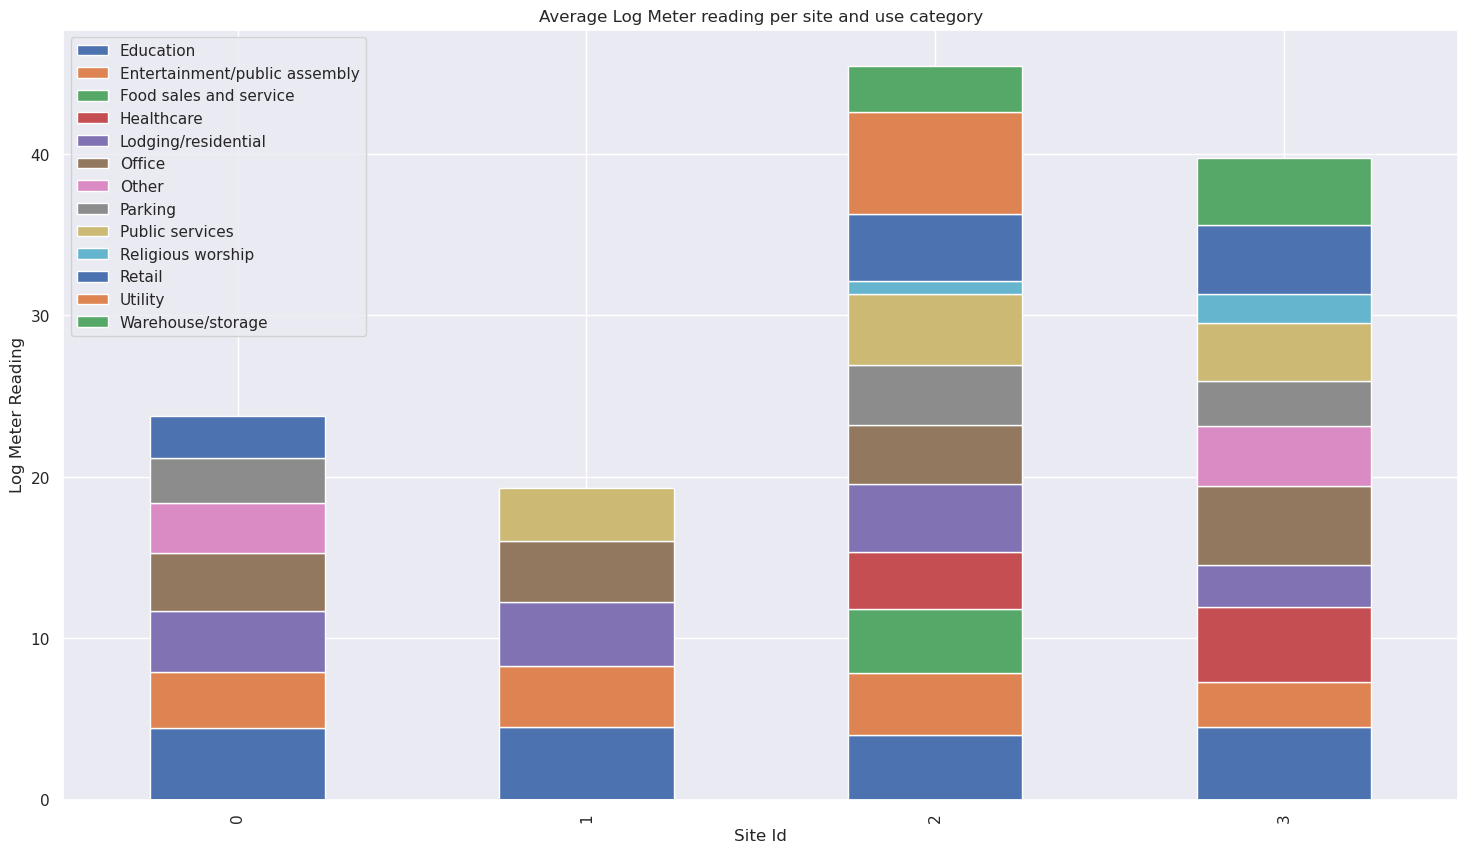

In [92]:
site_use_grouping = train.groupby(['site_id','primary_use'])['meter_reading'].mean().unstack('primary_use')
site_use_grouping.plot(kind = 'bar', stacked = True, figsize=(18,10)).set_title("Average Log Meter reading per site and use category")
plt.xlabel('Site Id')
plt.ylabel('Log Meter Reading')
plt.legend(loc="upper left")
plt.show

## Exploring Average Readings per Hour and Month

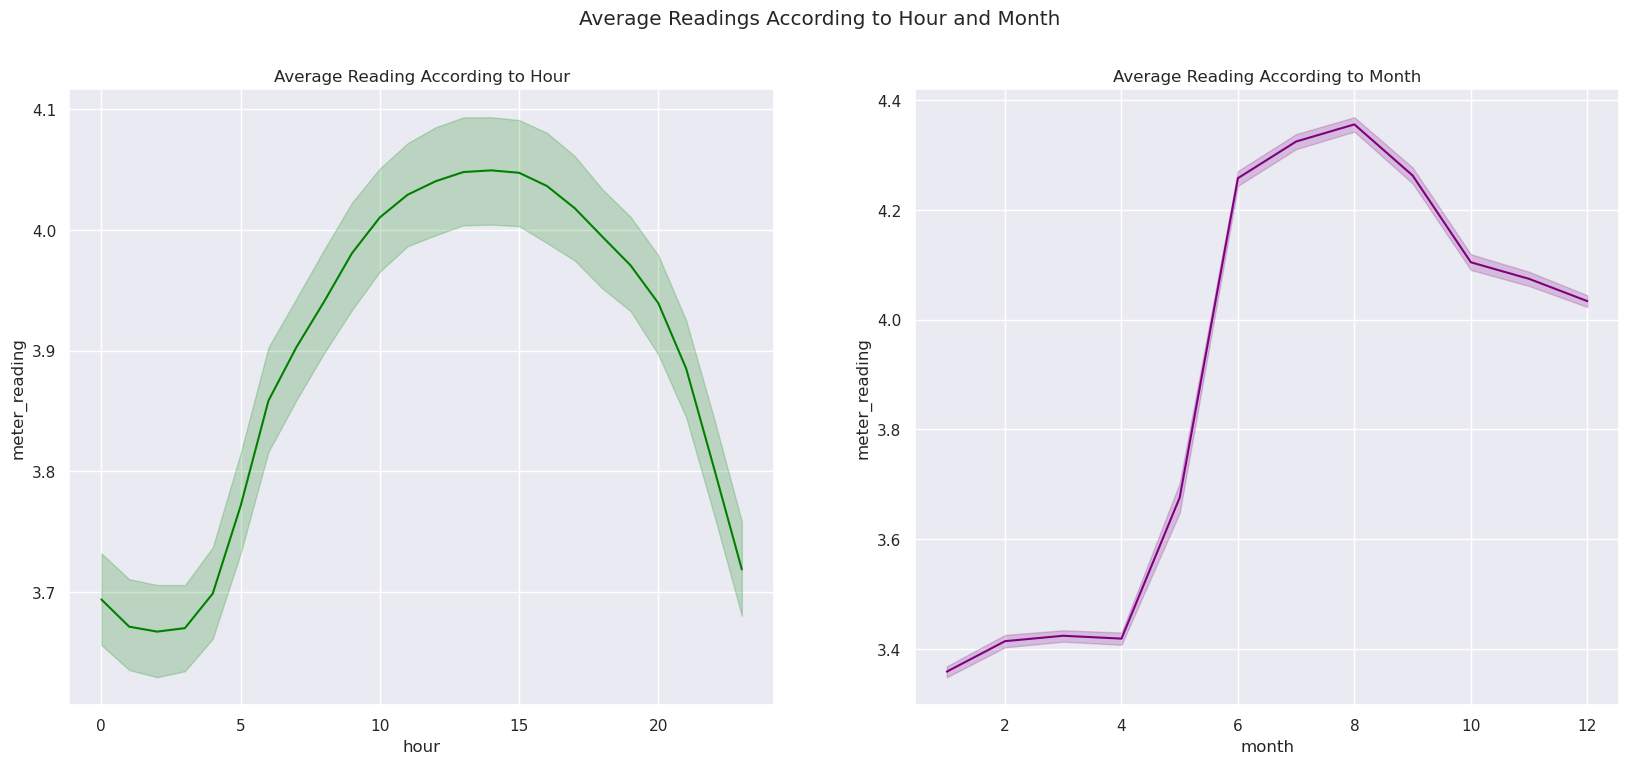

In [93]:
hour_groups = train.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
month_groups = train.groupby(['timestamp','month']).meter_reading.mean().reset_index()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Average Readings According to Hour and Month')

sns.lineplot(x=hour_groups['hour'], y = hour_groups['meter_reading'],color='green', ax=ax1)
ax1.set_title('Average Reading According to Hour')

sns.lineplot(x=month_groups['month'], y = month_groups['meter_reading'], color='purple', ax=ax2)
ax2.set_title('Average Reading According to Month')

plt.show()

## Exploring Average Readings per Building

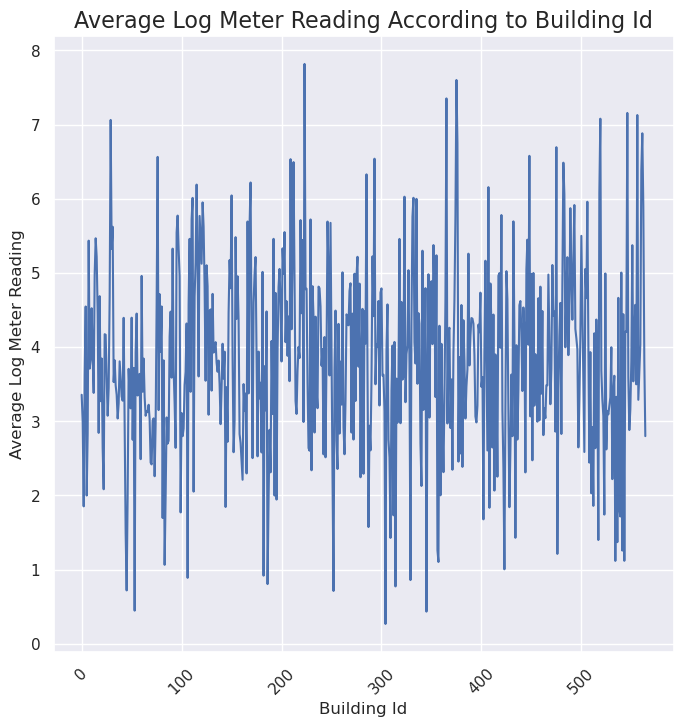

In [94]:
building_groups = train.groupby(['building_id']).meter_reading.mean().reset_index()

plt.figure(figsize=(8,8))
sns.lineplot(x = building_groups['building_id'], y = building_groups.meter_reading).set_title("Average Log Meter Reading According to Building Id", fontsize=16)
plt.xlabel('Building Id', fontsize=12)
plt.ylabel('Average Log Meter Reading', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Checking Missing Value

In [95]:
missing_values = pd.DataFrame(train.isnull().sum()*100/ len(train))
missing_values.columns =["Missing Values"]

missing_values= missing_values[missing_values["Missing Values"] !=0]
missing_values.sort_values(by = "Missing Values", axis=0,ascending = False, inplace = True)

missing_values

,Missing Values
floor_count,91.526482
cloud_coverage,39.443632
year_built,30.002582
precip_depth_1_hr,8.940073
wind_direction,3.760902
sea_level_pressure,1.095104
wind_speed,0.079872
dew_temperature,0.076212
air_temperature,0.067943


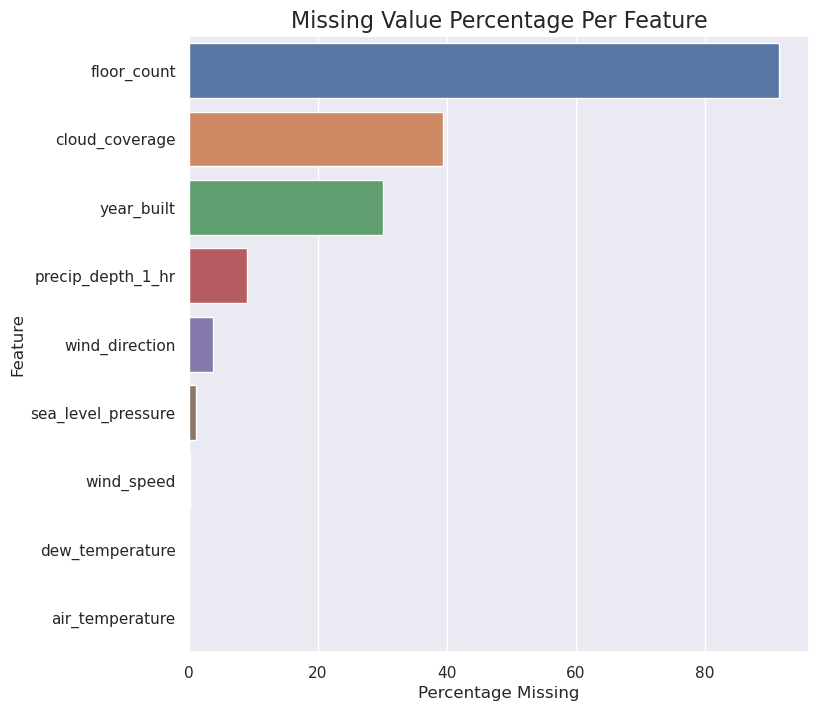

In [96]:
plt.figure(figsize=(8,8))
sns.barplot(x=missing_values['Missing Values'], y = missing_values.index).set_title("Missing Value Percentage Per Feature", fontsize = 16)
plt.xlabel('Percentage Missing', fontsize =12)
plt.ylabel('Feature', fontsize=12)
plt.show()

## Visualizing Correlation Between the Different features

In [97]:
correlation_matrix = train.corr()

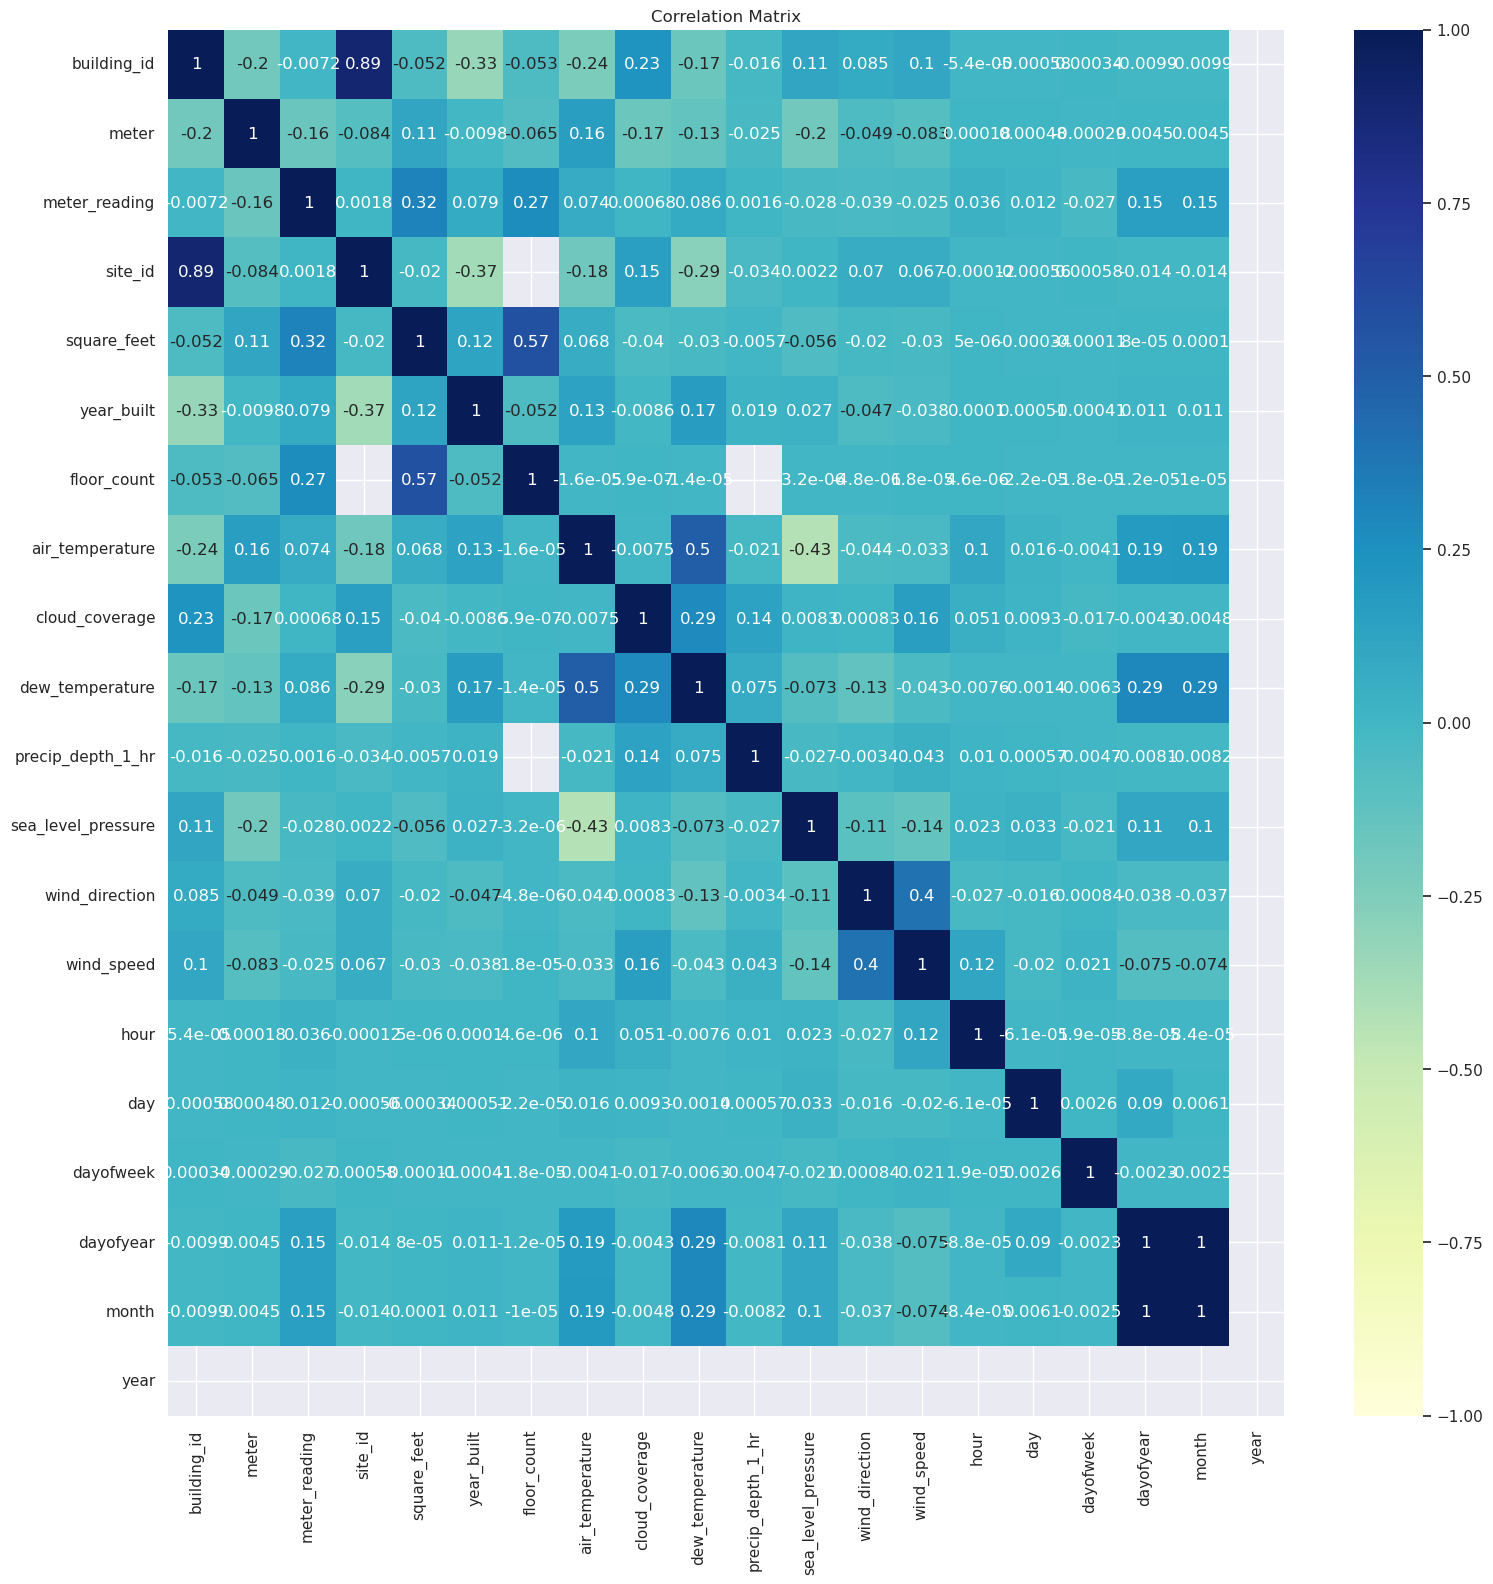

In [98]:
plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot=True, vmin =-1, cmap="YlGnBu").set_title('Correlation Matrix')
plt.show()

In [99]:
target_corr_df = pd.DataFrame(correlation_matrix)["meter_reading"].sort_values(ascending=False)
target_corr_df

meter_reading         1.000000
square_feet           0.317248
floor_count           0.268052
dayofyear             0.149544
month                 0.149188
dew_temperature       0.085920
year_built            0.078808
air_temperature       0.073585
hour                  0.035534
day                   0.012432
site_id               0.001766
precip_depth_1_hr     0.001642
cloud_coverage        0.000683
building_id          -0.007200
wind_speed           -0.024636
dayofweek            -0.026853
sea_level_pressure   -0.027592
wind_direction       -0.038899
meter                -0.161949
year                       NaN
Name: meter_reading, dtype: float64

## Visulalizing Features Histograms

<function matplotlib.pyplot.show(close=None, block=None)>

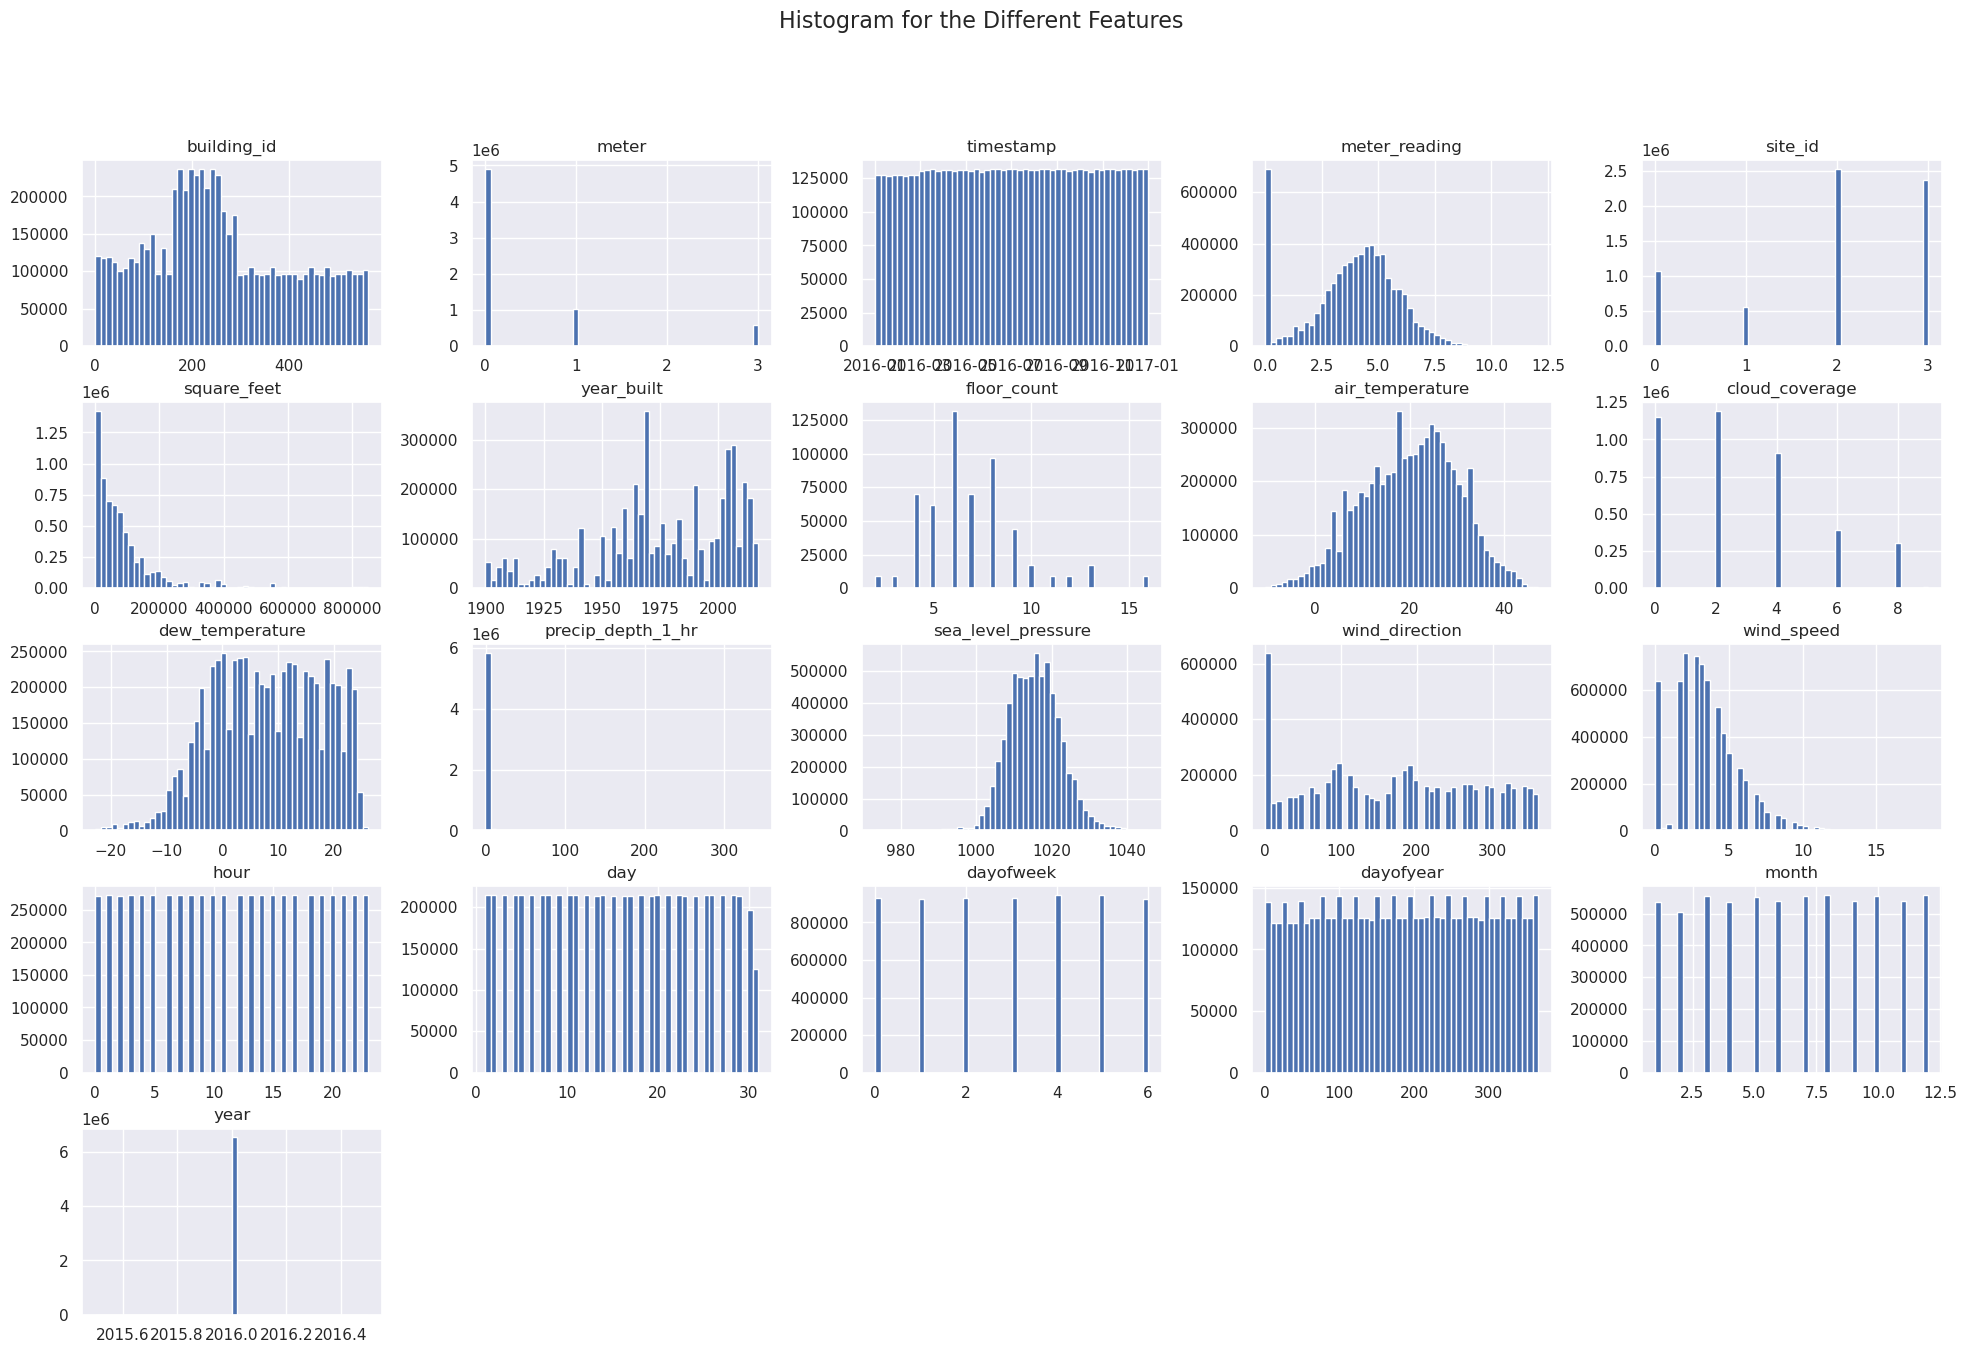

In [100]:
train.hist(bins=50, figsize=(24,15))
plt.suptitle('Histogram for the Different Features', fontsize=16)
plt.show

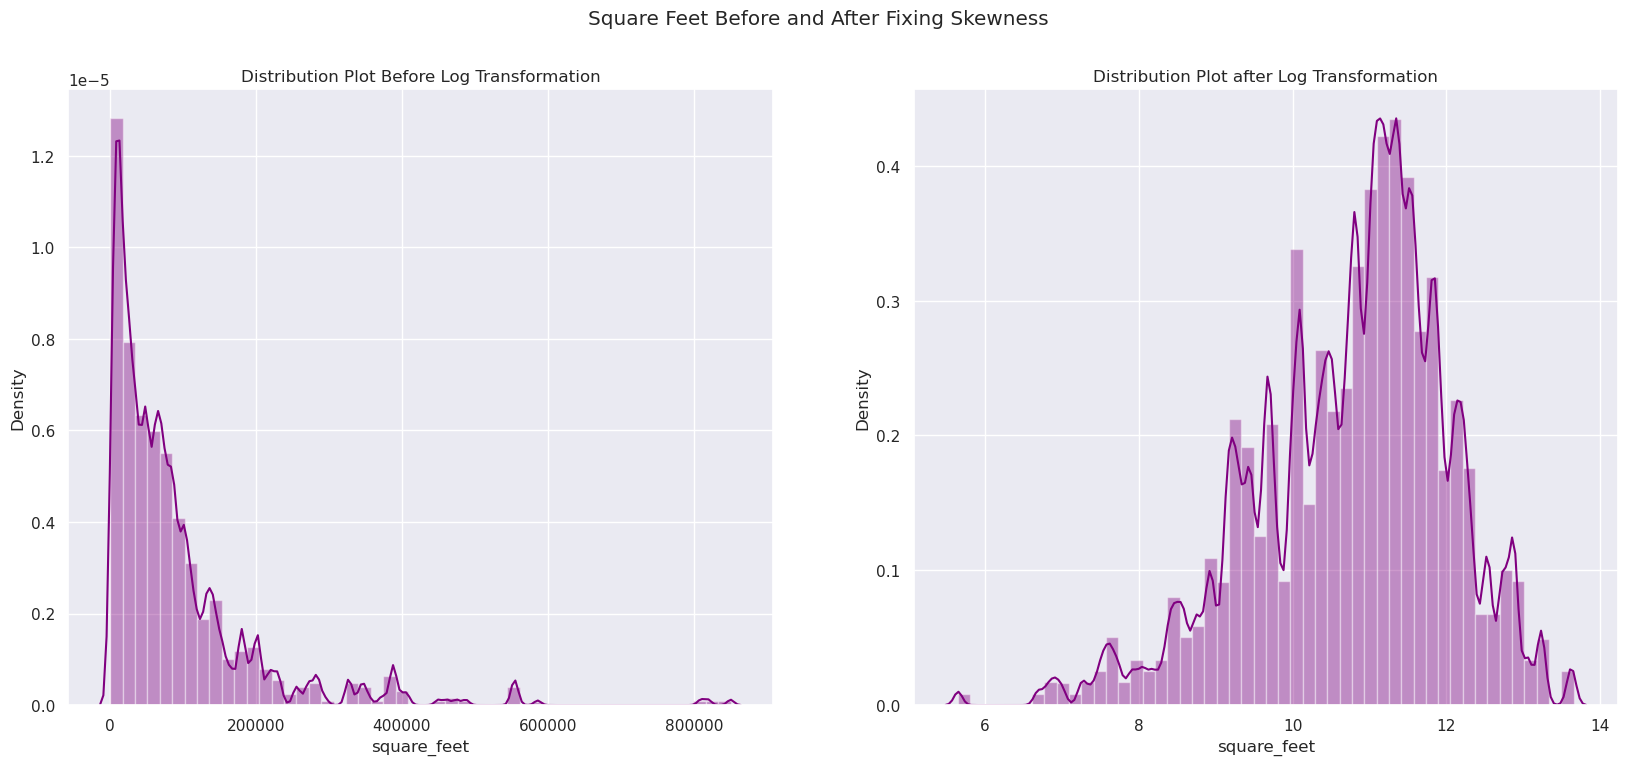

In [101]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Square Feet Before and After Fixing Skewness')

sns.distplot(train['square_feet'], color='purple', ax=ax1)
ax1.set_title('Distribution Plot Before Log Transformation')

sns.distplot(np.log1p(train['square_feet']), color='purple', ax=ax2)
ax2.set_title('Distribution Plot after Log Transformation')

plt.show()

In [102]:
print('Square Feet Skewness before Log Transformation is:', train['square_feet'].skew())
train['square_feet']=np.log1p(train['square_feet'])
print('Square Feet skewness after Log Transoformation is: ', train['square_feet'].skew())

Square Feet Skewness before Log Transformation is: 2.9604837384353426
Square Feet skewness after Log Transoformation is:  -0.6170873325467392


# Part-2: Feature Engineering

## Removing Zero Meter Readings

In [103]:
zero_meter_readings = list(train[train['meter_reading']==0].index)
train.drop(zero_meter_readings, axis=0, inplace = True)

In [104]:
print('New Shape of train data:', train.shape)

New Shape of train data: (5873254, 22)


## Dropping Columns with More than Half missing values

In [105]:
threshold = len(train)*0.5
train.dropna(axis=1, thresh = threshold, inplace=True)

In [106]:
print('New Shape of Train Data:',train.shape)

New Shape of Train Data: (5873254, 21)


## Filling Missing Values

In [107]:
train['cloud_coverage'].fillna(train['cloud_coverage'].median(), inplace=True)
train['sea_level_pressure'].fillna(train['sea_level_pressure'].median(), inplace=True)
train['precip_depth_1_hr'].fillna(train['precip_depth_1_hr'].median(), inplace=True)
train['wind_direction'].fillna(train['wind_direction'].median(), inplace=True)
train['wind_speed'].fillna(train['wind_speed'].median(), inplace=True)
train['dew_temperature'].fillna(train['dew_temperature'].median(), inplace=True)
train['air_temperature'].fillna(train['air_temperature'].median(), inplace=True)

In [108]:
train.isnull().sum()/len(train)

building_id           0.000000
meter                 0.000000
timestamp             0.000000
meter_reading         0.000000
site_id               0.000000
primary_use           0.000000
square_feet           0.000000
year_built            0.324306
air_temperature       0.000000
cloud_coverage        0.000000
dew_temperature       0.000000
precip_depth_1_hr     0.000000
sea_level_pressure    0.000000
wind_direction        0.000000
wind_speed            0.000000
hour                  0.000000
day                   0.000000
dayofweek             0.000000
dayofyear             0.000000
month                 0.000000
year                  0.000000
dtype: float64

## Adding New Features


In [109]:
train['season']=train['timestamp'].apply(lambda x: 'Spring' if x.month==3 or x.month==4 or x.month==5 else 'Summer' if x.month==6 or x.month==7 or x.month==8 else 'Autumn' if x.month==9 or x.month==10 or x.month==11 else 'Winter')
train['isDayTime']=train['timestamp'].apply(lambda x: 1 if x.hour>=6 and x.hour<=18 else 0)

In [110]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,...,wind_direction,wind_speed,hour,day,dayofweek,dayofyear,month,year,season,isDayTime
45,46,0,2016-01-01,3.993413,0,Retail,9.110078,2016.0,25.0,6.0,...,0.0,0.0,0,1,4,1,1,2016,Winter,0
72,74,0,2016-01-01,3.784219,0,Parking,12.867830,1997.0,25.0,6.0,...,0.0,0.0,0,1,4,1,1,2016,Winter,0
91,93,0,2016-01-01,3.978196,0,Office,10.415443,1982.0,25.0,6.0,...,0.0,0.0,0,1,4,1,1,2016,Winter,0
103,105,0,2016-01-01,3.190624,1,Education,10.832181,NaN,3.8,2.0,...,240.0,3.1,0,1,4,1,1,2016,Winter,0
104,106,0,2016-01-01,0.318163,1,Education,8.589514,NaN,3.8,2.0,...,240.0,3.1,0,1,4,1,1,2016,Winter,0


## Encoding Categorical Data

In [111]:
categorical_features =['primary_use','season']

In [112]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()

for i in categorical_features:
    train[i]=encoder.fit_transform(train[i])
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5873254 entries, 45 to 6530427
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         int64         
 6   square_feet         float64       
 7   year_built          float64       
 8   air_temperature     float64       
 9   cloud_coverage      float64       
 10  dew_temperature     float64       
 11  precip_depth_1_hr   float64       
 12  sea_level_pressure  float64       
 13  wind_direction      float64       
 14  wind_speed          float64       
 15  hour                uint8         
 16  day                 uint16        
 17  dayofweek           uint64        
 18  dayofyear           uint16        
 19  month               uint8         
 20  y

In [113]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,...,wind_direction,wind_speed,hour,day,dayofweek,dayofyear,month,year,season,isDayTime
45,46,0,2016-01-01,3.993413,0,10,9.110078,2016.0,25.0,6.0,...,0.0,0.0,0,1,4,1,1,2016,3,0
72,74,0,2016-01-01,3.784219,0,7,12.867830,1997.0,25.0,6.0,...,0.0,0.0,0,1,4,1,1,2016,3,0
91,93,0,2016-01-01,3.978196,0,5,10.415443,1982.0,25.0,6.0,...,0.0,0.0,0,1,4,1,1,2016,3,0
103,105,0,2016-01-01,3.190624,1,0,10.832181,NaN,3.8,2.0,...,240.0,3.1,0,1,4,1,1,2016,3,0
104,106,0,2016-01-01,0.318163,1,0,8.589514,NaN,3.8,2.0,...,240.0,3.1,0,1,4,1,1,2016,3,0


# Features Selection

## Creating Training and Testing Data for the Model to Work With

In [114]:
train=train.drop(['timestamp'],axis=1)

In [115]:
x=train.drop(['meter_reading'],axis=1)
y=train['meter_reading']

## Running the Feature Selection Model

In [116]:
from sklearn.model_selection import KFold
import lightgbm as lgb
import gc

parameters={
    
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':{'rmse'},
    'subsample': 0.2,
    'learning_rate':0.9,
    'feature_fraction':0.9,
    'bagging_fraction':0.9,
    'alpha':0.1,
    'lambda':0.1,
    'num_leaves':110,
    'max_bin':66,
    'max_depth':10,
    'min_data_in_leaf':30,
    
}

kf=KFold(n_splits=5, shuffle =True, random_state=42)
models=[]
for train_index, val_index in kf.split(x):
    train_x=x.iloc[train_index]
    val_x=x.iloc[val_index]
    train_y=y.iloc[train_index]
    val_y=y.iloc[val_index]
    lgb_train=lgb.Dataset(train_x,train_y)
    lgb_eval=lgb.Dataset(val_x,val_y)
    gbm=lgb.train(parameters,lgb_train,num_boost_round=10, valid_sets=(lgb_train,lgb_eval), early_stopping_rounds=10, verbose_eval=10)
    
    models.append(gbm)
    gc.collect()

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.2 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.2 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.636839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 4698603, number of used features: 20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.2 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Start training from score 4.332949
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 0.501375	valid_1's rmse: 0.50267
Did not meet early stopping. Best iteration is:
[10]	training's rmse: 0.501375	valid_1's rmse: 0.50267
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.2 will be ignored. Cur

### Visualizing the Feature Importance Highlighted by the Model

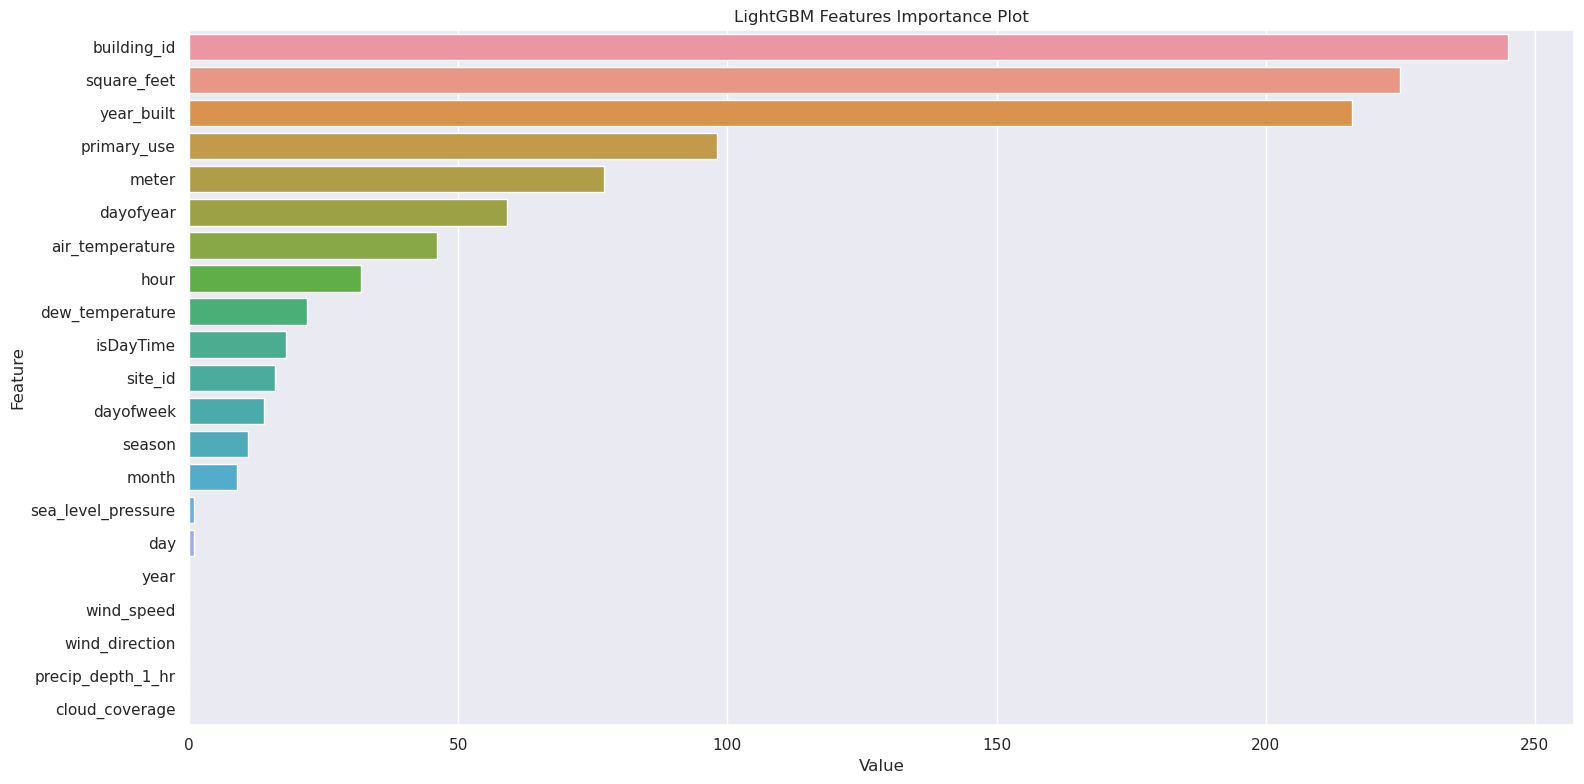

In [117]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(),gbm.feature_name()), reverse = True), columns=['Value','Feature'])

plt.figure(figsize=(16,8))

sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending = False))

plt.title('LightGBM Features Importance Plot')

plt.tight_layout()
plt.show()

### Removing the Least Important feautres as Indicated by the Feature Selection Method

In [118]:
new_data=train[['building_id','square_feet','primary_use','meter','site_id','air_temperature','dayofyear','hour','isDayTime','dew_temperature','dayofweek','meter_reading']]

### Creating a Heatmap to See the Correlated Features in the New Data

Text(0.5, 1.0, 'Correlation Matrix')

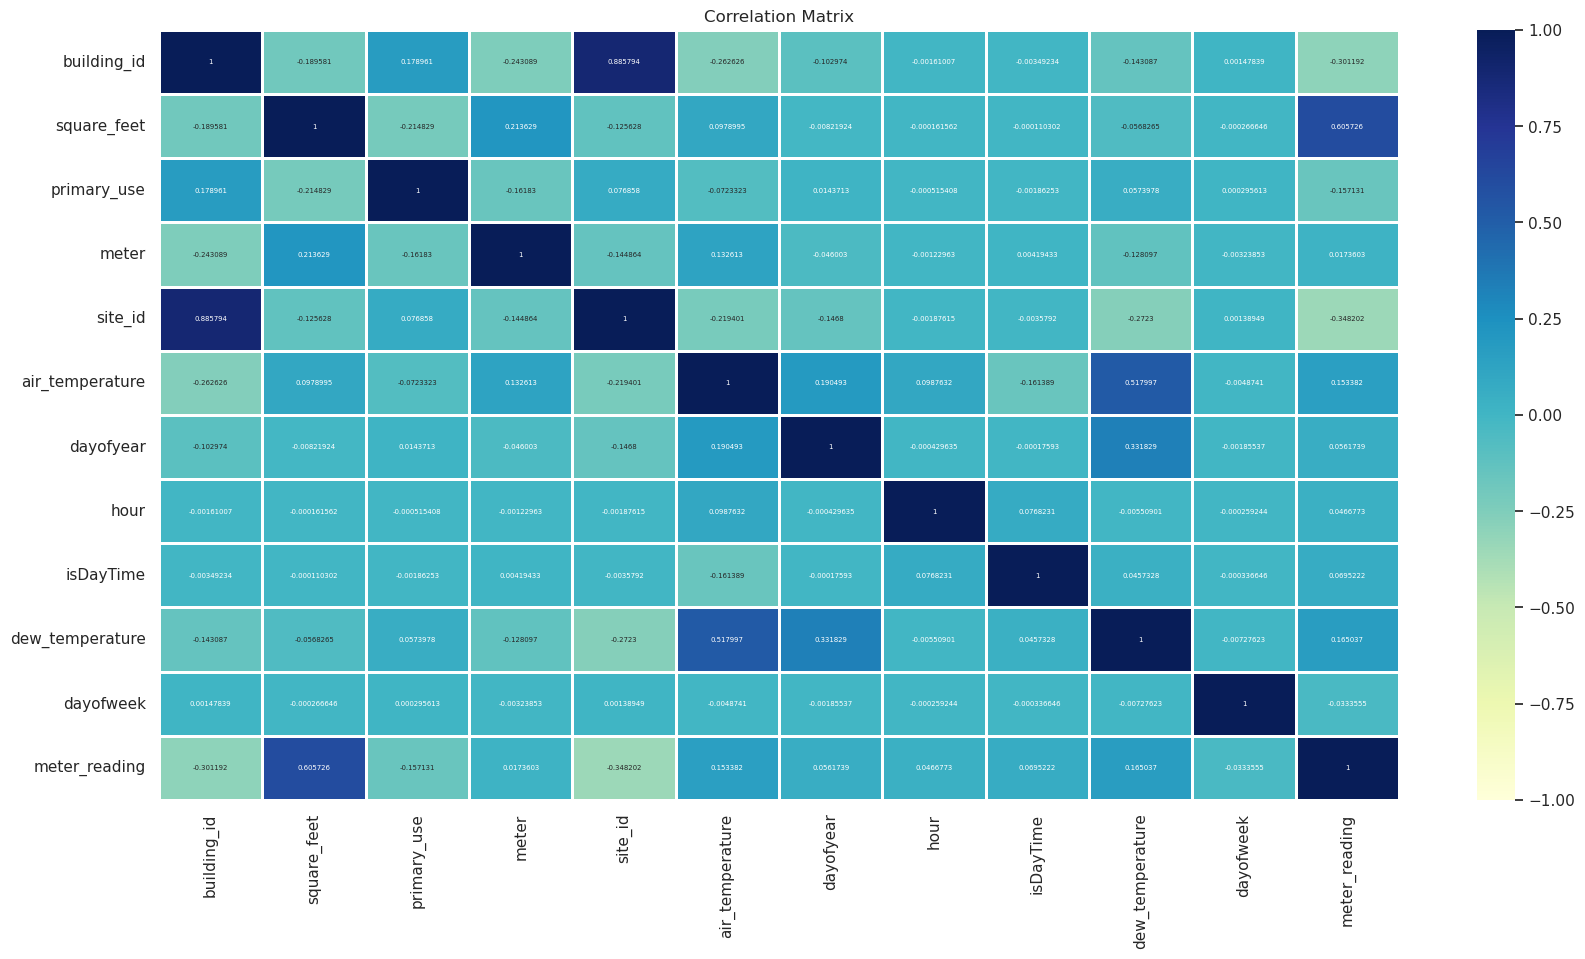

In [119]:
fig, ax=plt.subplots(figsize=(20,10))

sns.heatmap(new_data.corr(), annot=True, vmin =-1, vmax=1, linewidths=1, annot_kws={"size": 5}, fmt="g",ax=ax,cmap="YlGnBu").set_title('Correlation Matrix')

### Removing Highly Correlated Features

In [120]:
new_data.drop(['site_id'],axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

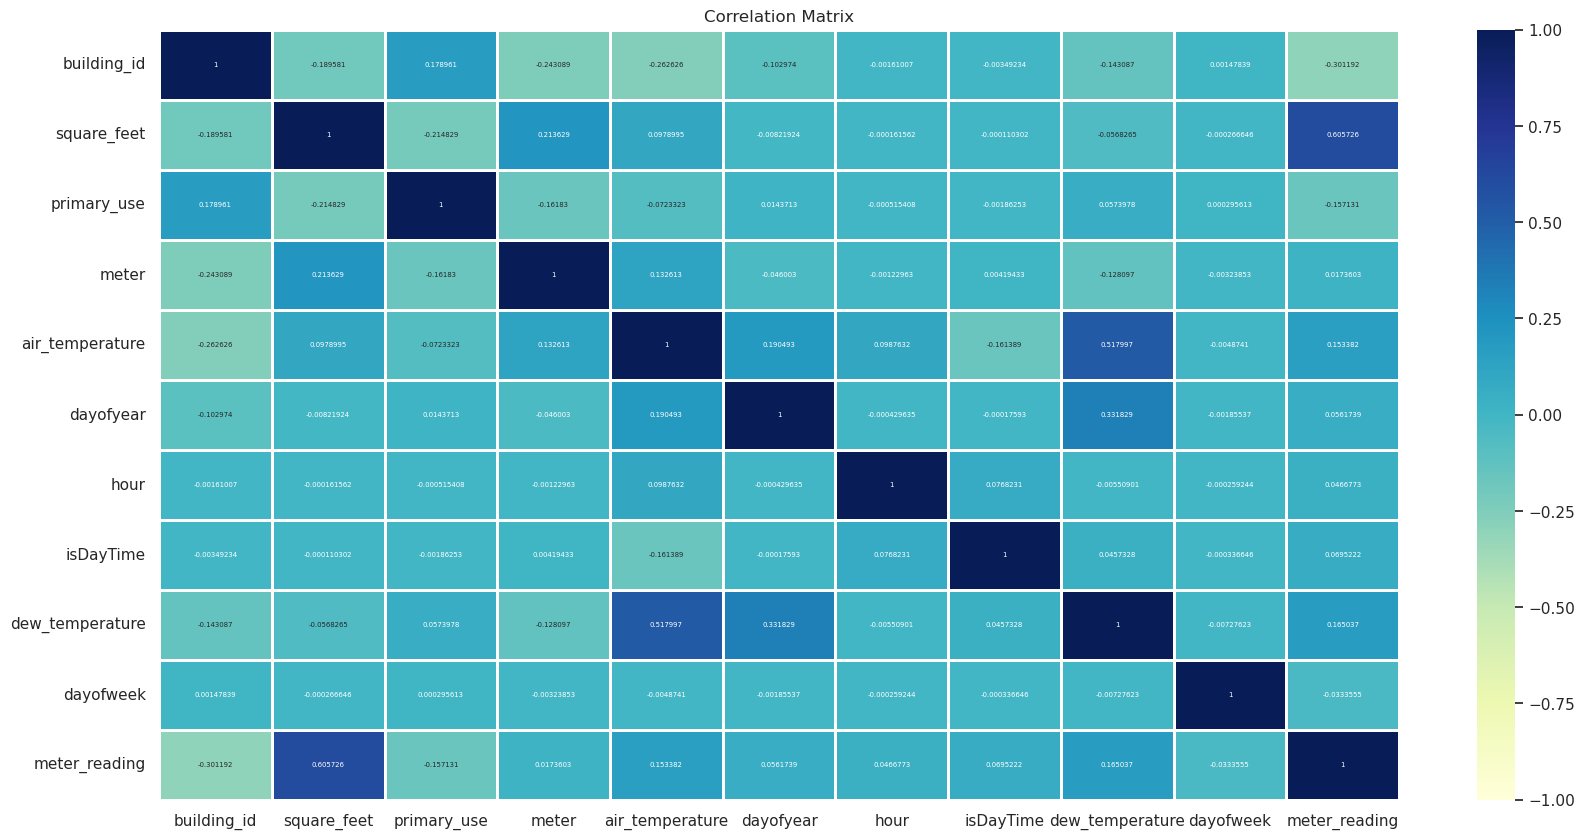

In [121]:
fig, ax=plt.subplots(figsize=(20,10))

sns.heatmap(new_data.corr(), annot=True, vmin =-1, vmax=1, linewidths=1, annot_kws={"size": 5}, fmt="g",ax=ax,cmap="YlGnBu").set_title('Correlation Matrix')

# Model and Fine Tuning


In [126]:
X_train = new_data.drop(['meter_reading'],axis=1)
Y_train = new_data['meter_reading'].values

In [138]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_train,Y_train,test_size=0.2,random_state=22)

In [139]:
from sklearn.metrics import mean_squared_error

def RMSLE(y_actual, y_pred):
    return np.sqrt(mean_squared_error(y_actual,y_pred))

In [140]:
from sklearn.linear_model import LinearRegression

linear_Regression = LinearRegression()
linear_Regression.fit(train_x,train_y)

LinearRegression()

In [143]:
print('Linear Regression Training RMSLE = ', RMSLE((train_y),(linear_Regression.predict(train_x))))
print('Linear Regression Testing RMSLE = ', RMSLE((test_y), (linear_Regression.predict(test_x))))

Linear Regression Training RMSLE =  1.140332642319957
Linear Regression Testing RMSLE =  1.1406421505924005


In [145]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(linear_Regression, train_x, train_y,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Linear Regression CV Scores:", lin_rmse_scores)
print("Mean CV Score",lin_rmse_scores.mean())

Linear Regression CV Scores: [1.13965891 1.14543102 1.13632235 1.13663583 1.14125766 1.14246346
 1.13977906 1.14140991 1.14167663 1.13869061]
Mean CV Score 1.1403325434807823


In [153]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[0.001,0.01,0.1,1,10,100,1000],
            'fit_intercept':[False],
            'l1_ratio':[0.5]}

elasticnet=GridSearchCV(estimator=ElasticNet(), param_grid=parameters, cv=3, scoring='neg_mean_squared_error', verbose=1,return_train_score=True, n_jobs = -1)
elasticnet.fit(train_x,train_y)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [False], 'l1_ratio': [0.5]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [154]:
print("Best ElasticNet Estimator is:", elasticnet.best_estimator_)
print("Best ElasticNet Parameters are", elasticnet.best_params_)

Best ElasticNet Estimator is: ElasticNet(alpha=0.001, fit_intercept=False)
Best ElasticNet Parameters are {'alpha': 0.001, 'fit_intercept': False, 'l1_ratio': 0.5}


In [155]:
elastic_model = ElasticNet(alpha = 0.001, fit_intercept = False, l1_ratio = 0.5)
elastic_model.fit(train_x,train_y)

ElasticNet(alpha=0.001, fit_intercept=False)

In [158]:
print('ElasticNet Training RMSLE =', RMSLE((train_y),(elastic_model.predict(train_x))))
print('ElasticNet Testing RMSLE =', RMSLE((test_y), (elastic_model.predict(test_x))))

ElasticNet Training RMSLE = 1.1816084910604603
ElasticNet Testing RMSLE = 1.1815071238274932
